# EDA - Retail

## Done By : Ritik Karayat 

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
sns.set(color_codes = True)
import warnings
warnings.filterwarnings(action="ignore")

## Studying The Data

In [189]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [190]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [191]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [192]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [193]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [194]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [195]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [196]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [197]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

# Cleaning The Data

## Dropping Irrelevant Columns

In [198]:
df = df.drop(['Country','City','State','Postal Code'],axis=1)
df.head()

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [199]:
df.shape

(9994, 9)

## Dropping Duplicate Rows

In [200]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows.shape)


(277, 9)


In [201]:
df.count()

Ship Mode       9994
Segment         9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [202]:
df = df.drop_duplicates()

In [203]:
df.count()

Ship Mode       9717
Segment         9717
Region          9717
Category        9717
Sub-Category    9717
Sales           9717
Quantity        9717
Discount        9717
Profit          9717
dtype: int64

In [204]:
df.shape

(9717, 9)

## Handling Missing Values(None in this case)

In [205]:
df.isnull().sum()

Ship Mode       0
Segment         0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [206]:
df.head()

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Relationship Analysis

In [207]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.199442,-0.030319,0.478893
Quantity,0.199442,1.000000,0.006176,0.066008
Discount,-0.030319,0.006176,1.000000,-0.220997
Profit,0.478893,0.066008,-0.220997,1.000000


In [208]:
df.cov()

,Sales,Quantity,Discount,Profit
Sales,397855.716892,282.013732,-3.969449,71719.338057
Quantity,282.013732,5.025541,0.002874,35.133534
Discount,-3.969449,0.002874,0.043082,-10.891110
Profit,71719.338057,35.133534,-10.891110,56372.950346


In [209]:
round(df['Sales'].sum(),2)

2268375.39

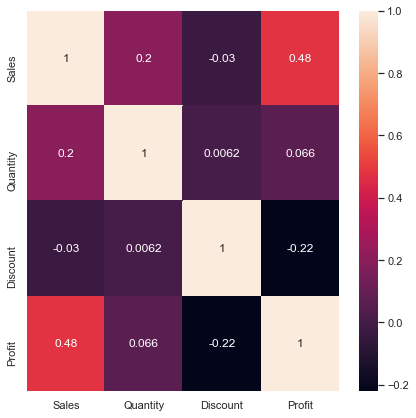

In [210]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Sales , Quantity & Profit have a positive co-relation whereas Discount has a negative co-relation

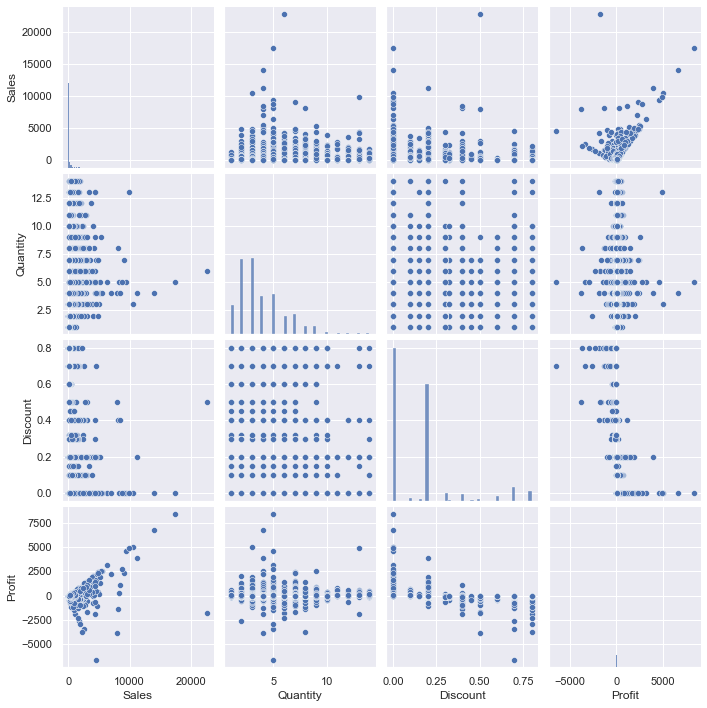

In [211]:
sns.pairplot(df)
plt.show()

## Univariate Analysis

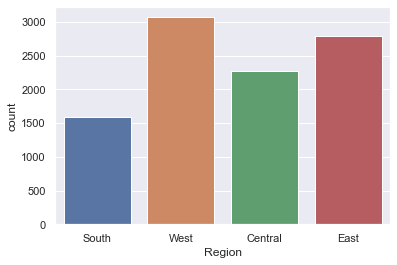

In [212]:
sns.countplot(x = 'Region',data = df)
plt.show()

In [213]:
df['Region'].value_counts()

West       3069
East       2789
Central    2265
South      1594
Name: Region, dtype: int64

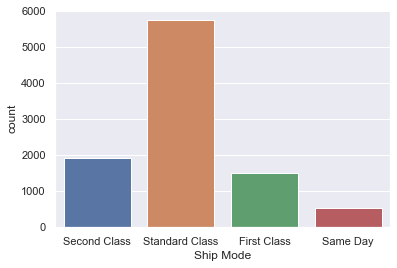

In [214]:
sns.countplot(x = 'Ship Mode',data = df)
plt.show()

In [215]:
df['Ship Mode'].value_counts()

Standard Class    5749
Second Class      1915
First Class       1516
Same Day           537
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

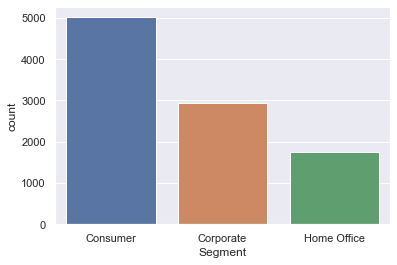

In [216]:
sns.countplot(x = 'Segment',data = df)

In [217]:
df['Segment'].value_counts()

Consumer       5022
Corporate      2937
Home Office    1758
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

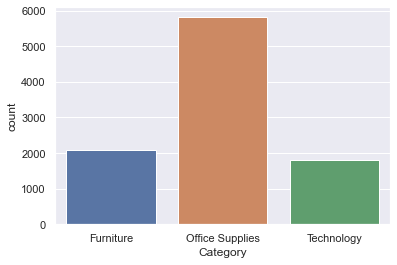

In [218]:
sns.countplot(x = 'Category',data = df)

In [219]:
df['Category'].value_counts()

Office Supplies    5814
Furniture          2089
Technology         1814
Name: Category, dtype: int64

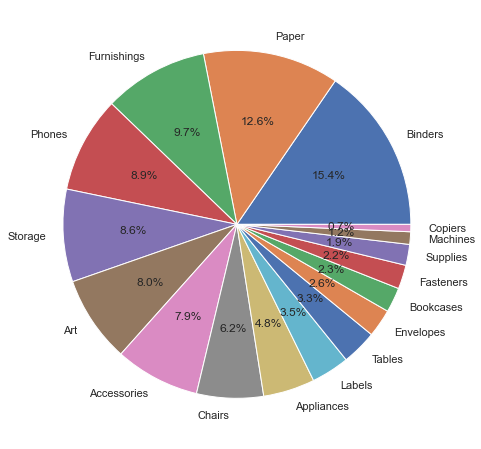

In [220]:
plt.figure(figsize=(15,8))
plt.pie(df["Sub-Category"].value_counts(),labels=df["Sub-Category"].value_counts().index,autopct="%0.1f%%")
plt.show()

In [221]:
round(df['Sales'].sum(),2)

2268375.39

In [222]:
round(df['Profit'].sum(),2)

281042.87

In [223]:
round(df['Quantity'].sum(),2)

37075

## Observations From Univariate Analysis

The SampleStore is situated in the **United States**
* The store sells in 49 states and 531 cities acrros US.
* The store delivers its products to **4 regions Central , South , West , East out of which West has more orders**
* The store delivers its products via **4 modes of shipment First Class,Second Class,Standard & Same Day out of which customers prefer using Standard the most.**
* There are 3 main categories of products & 17 Sub-categories. **Office Supplies,Furniture & Technology are the 3 main categories out of which Office Supplies were the highest in demand.**
* The sum total of Sales = **2.268 M**
* Profit = **281 K**
* Quantity Sold = **37075**
* Orders Placed = **9717**


  

In [224]:

df.shape

(9717, 9)

## Bivariate Analysis

## 1. With Respect to Sales

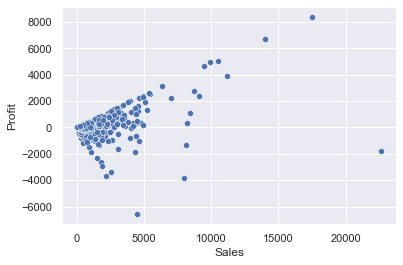

In [225]:
sns.scatterplot(df['Sales'],df['Profit'])
plt.show()

Region-wise Sales


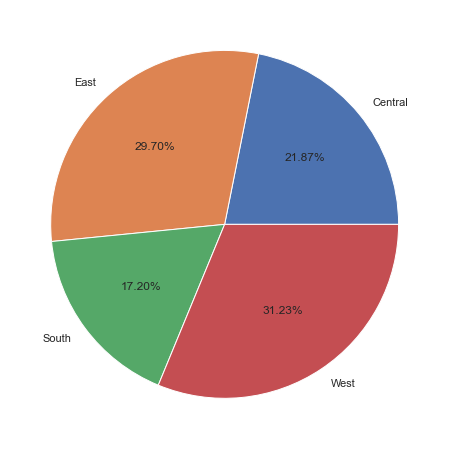

In [226]:
print("Region-wise Sales")
plt.figure(figsize=(15,8))
plt.pie(df['Sales'].groupby(df.Region).sum(), 
        labels = df['Sales'].groupby(df.Region).sum().index,
        autopct = '%.2f%%')
plt.show()

Category-wise Sales


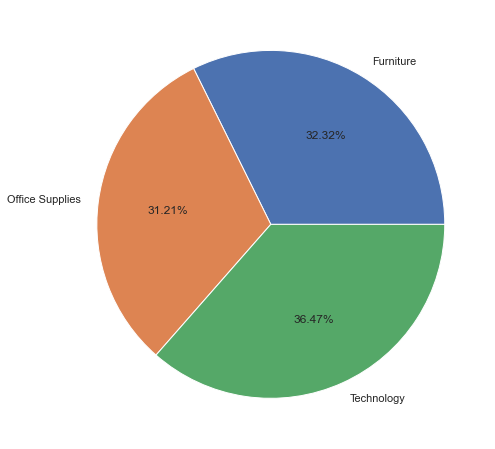

In [227]:
print("Category-wise Sales")
plt.figure(figsize=(12,8))
plt.pie(df['Sales'].groupby(df.Category).sum(), 
        labels = df['Sales'].groupby(df.Category).sum().index,
        autopct = '%.2f%%')
plt.show()

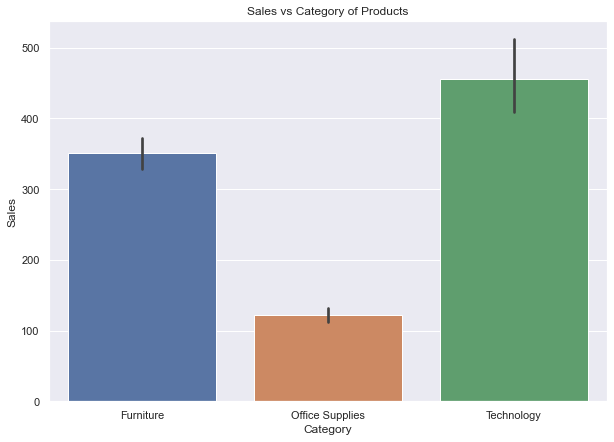

In [228]:
plt.figure(figsize = (10,7))
plt.title('Sales vs Category of Products')
sns.barplot(df['Category'],df['Sales'])
plt.show()

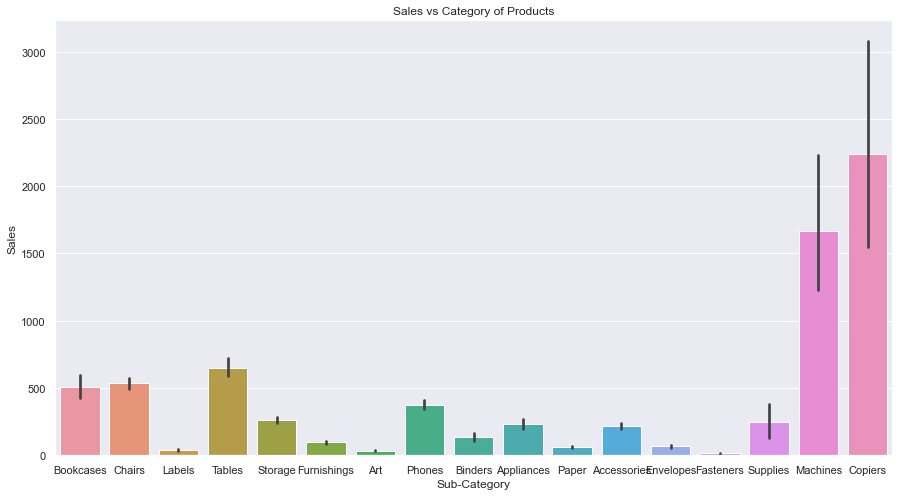

In [229]:
plt.figure(figsize = (15,8))
plt.title('Sales vs Category of Products')
sns.barplot(df['Sub-Category'],df['Sales'])
plt.show()

## 2. With Respect to Profit

Profit Region-wise


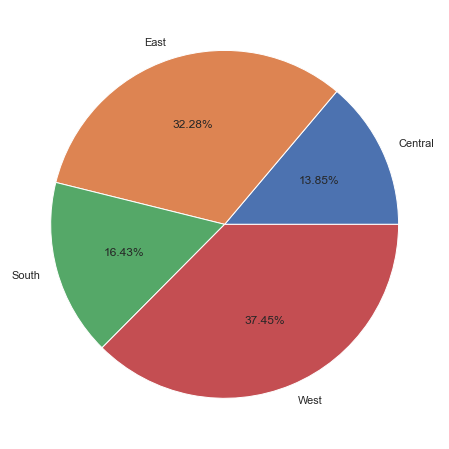

In [230]:
print("Profit Region-wise")
plt.figure(figsize = (15,8))
plt.pie(df["Profit"].groupby(df.Region).sum(), 
        labels = df['Profit'].groupby(df.Region).sum().index,
        autopct = '%.2f%%')
plt.show()

Profit Category-wise


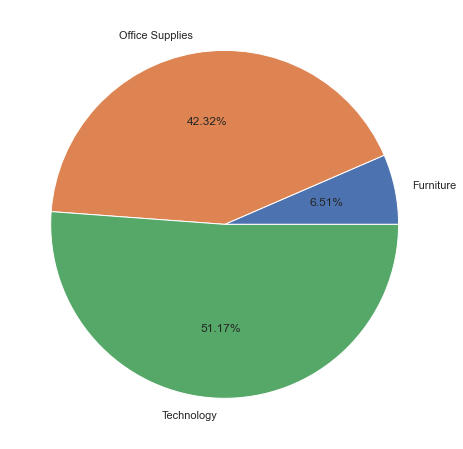

In [231]:
print("Profit Category-wise")
plt.figure(figsize = (15,8))
plt.pie(df['Profit'].groupby(df.Category).sum(), 
        labels = df['Profit'].groupby(df.Category).sum().index,
        autopct = '%.2f%%')
plt.show()

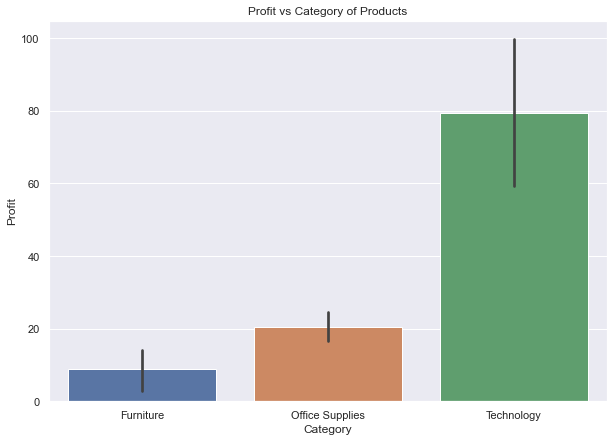

In [232]:
plt.figure(figsize = (10,7))
plt.title('Profit vs Category of Products')
sns.barplot(df['Category'],df['Profit'])
plt.show()

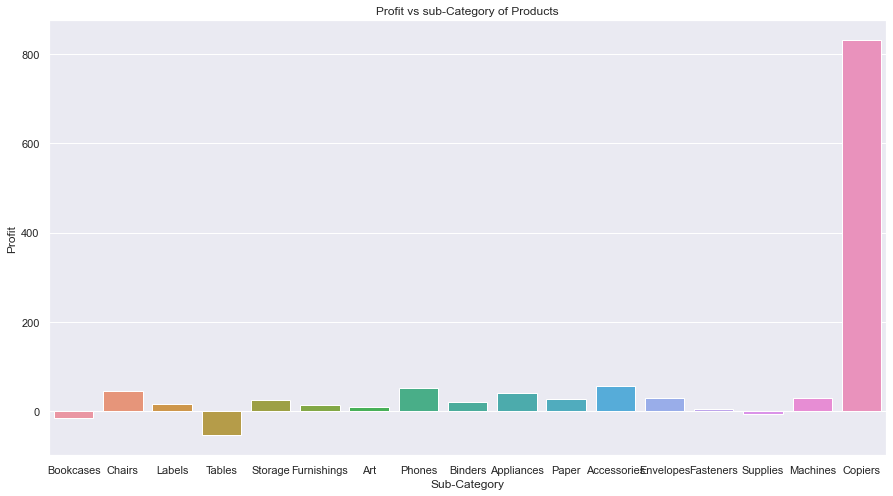

In [233]:
plt.figure(figsize=(15,8))
plt.title('Profit vs sub-Category of Products')
sns.barplot(x ='Sub-Category', y ='Profit', data=df,ci=0)
plt.show()

## Observations From Bivariate Analysis

* The **Western region** leads the Sales contributing to upto 32% of the total followed by **Eastern region** which has 29%.
* The most Sales and Profit is generated by **Technology** Category around 36% and 50%.
* The most Profit is generated by the **Western Region** around 37%.
* Copiers generate the maximum **Profit & Sales**.
* Tables & Bookcases are being sold at a loss.

## Multivariate Analysis

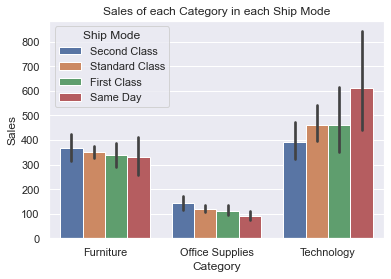

In [234]:
plt.title('Sales of each Category in each Ship Mode')
sns.barplot(x = 'Category', y = 'Sales', data = df, hue = df['Ship Mode'])
plt.show()

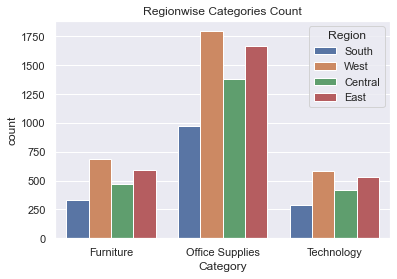

In [235]:
plt.title("Regionwise Categories Count")
sns.countplot(x = 'Category', data = df, hue = df['Region'])
plt.show()

## Insights derived from Multivariate Analysis

* Products under the **category of 'Technology'** has the **highest sales** and the **preferred Ship Mode is 'Same Day'.** **'Second Class'** ship mode is the **least preferred** for products under Technology
* **Highest quantity** of products sold belong to the **Office Supplies** and they are sold the **most in the Western Region** followed by the Eastern Region


In [236]:
df.head()

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Geographical Plotting with plotly 

In [237]:
import pandas as pd
import numpy as np
from plotly import __version__
import plotly.graph_objs as go 
import pandas as pd
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [238]:
data=pd.read_csv('SampleSuperstore.csv')

In [239]:
list1=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']
list2=['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE',
       'District of Columbia', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
       'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
       'WI', 'WY']

In [240]:
list3=list(zip(list1,list2))
dict1=dict(list3)
data['State_code']=data['State']
data['State_code'].replace(dict1, inplace=True)
df2=data.copy()

In [241]:
fig=px.histogram(data,x='Profit',nbins=200)
fig.show()

##  As the Profit is concentrated between 0 to 150
##  I only included that for better visualization

In [242]:
df_profit_less_150 = df2[df2['Profit']<=150]
final_df_profit = df_profit_less_150[~(df_profit_less_1000['Profit']<=-150)]
df = final_df_profit.copy()

In [243]:
data = dict(type='choropleth',
            colorscale = 'viridis',
            reversescale = True,
            locations = df['State_code'],
            z = df['Profit'],
            locationmode = 'USA-states',
            text = df['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Profit"}
            ) 

In [244]:
layout = dict(title = 'Profit in USA Statewise',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [245]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

'temp-plot.html'

In [246]:
fig=px.histogram(df,x='Sales',nbins=200)
fig.show()

In [247]:
df_sales_less_175 = df2[df2['Sales']<=75]
final_df_sales = df_sales_less_175[~(df_sales_less_175['Profit']<=-25)]
df=final_df_sales.copy()

In [248]:
data = dict(type='choropleth',
            colorscale = 'viridis',
            reversescale = True,
            locations = df['State_code'],
            z = df['Sales'],
            locationmode = 'USA-states',
            text = df['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Sales"}
            ) 

In [249]:
layout = dict(title = 'Sales in USA Statewise',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [250]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

'temp-plot.html'

## Conclusion

### * The Store should come up with a strategy to increase the profit generated by the products in the 'Furniture' category


### * They should stop selling **Tables and Bookcases** because they are contributing to loss.